# Descriptive Data Statistics 

In [1]:
library(ggplot2)
library(reshape2)
library(readr)
library(readxl)
library(patchwork)

In [56]:
data <- read_excel('/Users/gabriel/Documents/GitHub/GabrielDelC/Tesis data/Data final findex.xlsx')

data$Fecha <- as.Date(data$Fecha, format = "%d/%m/%y")
head(data)

Fecha,BZSCORE,NPL,GLOBAL_CAP,BANK_CON,CREDIT,INFLATION,CONSUM,INVEST,GROWTH,FIN_OPEN,VIX,TERMS,FINDEX
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2001-03-31,0.8540510,10.393333,12.47667,1634.992,-32.4954417,2.0631384,1.22339606,-18.916925,-4.639113,10.244489,26.33667,6.515126,0.006177982
2001-06-30,0.9177764,10.193333,12.20000,1649.719,6.8619593,-1.2932459,1.60956003,-7.225866,-0.461018,9.878376,22.39333,-3.828285,0.013128082
2001-09-30,1.0230505,9.976667,12.70667,1621.507,-14.8054956,0.2450943,1.10115694,-5.314362,2.447751,9.289471,26.15667,2.542387,0.000000000
2001-12-31,1.0332438,9.456667,13.20333,1598.407,-6.9292332,-0.1491401,-0.01750694,-6.326589,5.123269,7.806468,27.06667,8.485228,0.022969585
2002-03-31,2.0234825,9.143333,12.99333,1567.966,2.1091937,-2.8883692,5.14995877,-1.486515,7.397504,7.522508,20.02667,13.237194,0.109466353
2002-06-30,1.7766204,8.480000,13.07000,1547.626,0.3882406,3.0843987,4.17132571,-2.860229,5.411200,7.645399,22.43000,7.814029,0.207372555


In [122]:
# data <- data[, !(colnames(data) %in% c("CONSUM", "INVEST"))]

In [57]:
# Excluir la columna no numérica (Fecha) y convertir el resto a numérico si es necesario
numeric_data <- data[sapply(data, is.numeric)]

# Calcular la matriz de correlaciones
cor_matrix <- cor(numeric_data, use = "pairwise.complete.obs") 

# Convertir la matriz de correlación a formato largo para ggplot2
cor_long <- melt(cor_matrix)

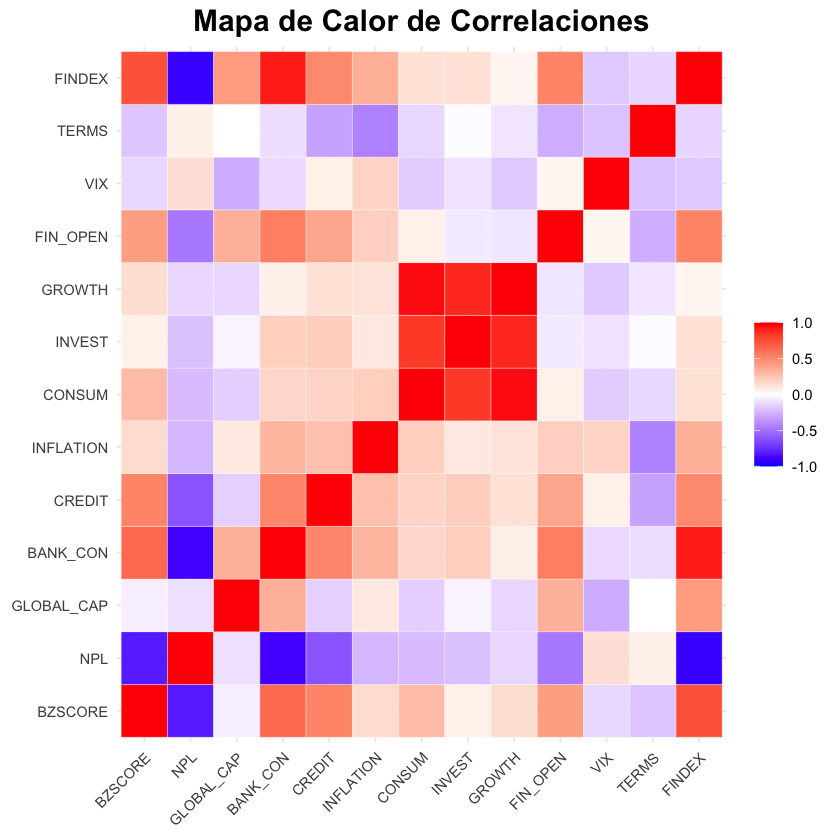

In [58]:
heatmap <- ggplot(cor_long, aes(Var1, Var2, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(
    low = "blue", high = "red", mid = "white", 
    midpoint = 0, limit = c(-1, 1), space = "Lab", 
    name = NULL
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1),
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5) # Título más grande y centrado
  ) +
  labs(
    x = NULL, 
    y = NULL, 
    title = "Mapa de Calor de Correlaciones"
  )

  heatmap

In [59]:
# Guardar el gráfico en formato PNG
ggsave("Correlaciones.png", plot = heatmap, width = 10, height = 8, dpi = 300)

In [126]:
#install.packages("moments")

In [4]:
library(dplyr)
library(tidyr)
library(moments)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'tidyr'


The following object is masked from 'package:reshape2':

    smiths




In [128]:
#install.packages("gridExtra")

In [5]:
library(ggplot2)
library(gridExtra)
library(grid)


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




In [60]:
variables <- names(numeric_data)
variables

[1] "BZSCORE"    "NPL"        "GLOBAL_CAP" "BANK_CON"   "CREDIT"    
 [6] "INFLATION"  "CONSUM"     "INVEST"     "GROWTH"     "FIN_OPEN"  
[11] "VIX"        "TERMS"      "FINDEX"

In [ ]:
# Ajustar gráficos eliminando los títulos de los ejes
plots <- lapply(variables, function(var) {
  ggplot(data, aes(x = Fecha, y = .data[[var]])) +
    geom_line(color = "blue", linewidth = 0.8) +  # Usar linewidth para las líneas
    theme_minimal() +
    labs(title = var, x = NULL, y = NULL) +  # Sin títulos en los ejes
    theme(
      plot.title = element_text(size = 25, face = "bold", hjust = 0.5),
      axis.text.x = element_text(size = 25),  # Ajustar tamaño del texto de los ejes
      axis.text.y = element_text(size = 25)
    )
})

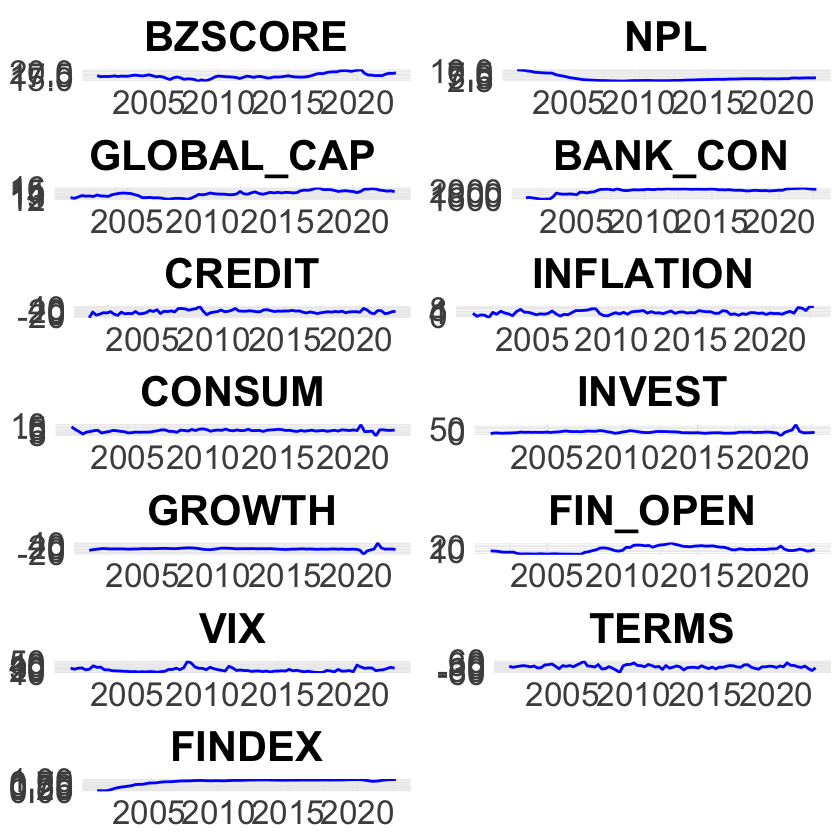

In [101]:
library(gridExtra)
library(grid)
grid.arrange(grobs = plots, ncol = 2, nrow = 7, 
             top = textGrob(NULL, gp = gpar(fontsize = 20, fontface = "bold")))

In [102]:
# Ajustar las dimensiones generales del gráfico
#png("Series de tiempo 4.png", width = 1800, height = 2000) # Aumentar dimensiones
#grid.arrange(grobs = plots, ncol = 2, nrow = 7, 
#             top = textGrob(NULL, gp = gpar(fontsize = 24, fontface = "bold")))
#dev.off() # Cerrar dispositivo gráfico


In [61]:
group1 <- c("BZSCORE", "NPL", "GLOBAL_CAP", "BANK_CON", "CREDIT")
group2 <- c("INFLATION", "CONSUM", "INVEST", "GROWTH")
group3 <- c("FIN_OPEN", "VIX", "TERMS")
group4 <- c("FINDEX")

In [62]:
# Función para generar gráficos con títulos personalizados
plot_group <- function(variables, titles, data) {
  if (length(variables) != length(titles)) {
    stop("El número de variables debe coincidir con el número de títulos.")
  }
  
  lapply(seq_along(variables), function(i) {
    ggplot(data, aes(x = Fecha, y = .data[[variables[i]]])) +
      geom_line(color = "blue", linewidth = 0.8) +
      theme_minimal() +
      labs(title = titles[i], x = NULL, y = NULL) +
      theme(
        plot.title = element_text(size = 28, face = "bold", hjust = 0.5),
        axis.text.x = element_text(size = 25),
        axis.text.y = element_text(size = 25)
      )
  })
}

In [10]:
Sys.setlocale("LC_ALL", "es_ES.UTF-8")

[1] "es_ES.UTF-8/es_ES.UTF-8/es_ES.UTF-8/C/es_ES.UTF-8/C"

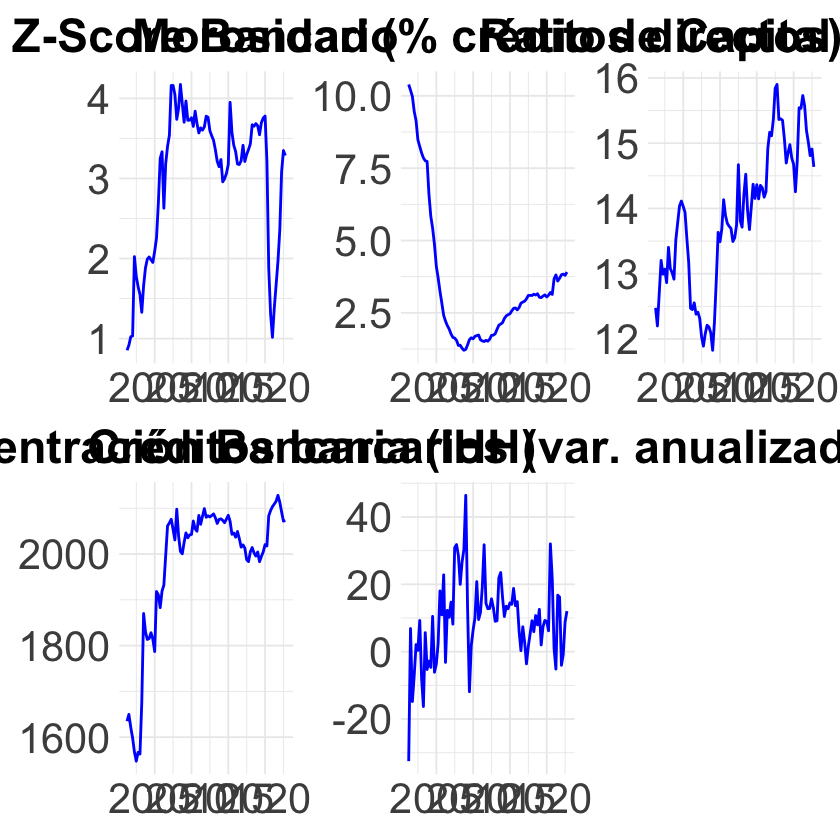

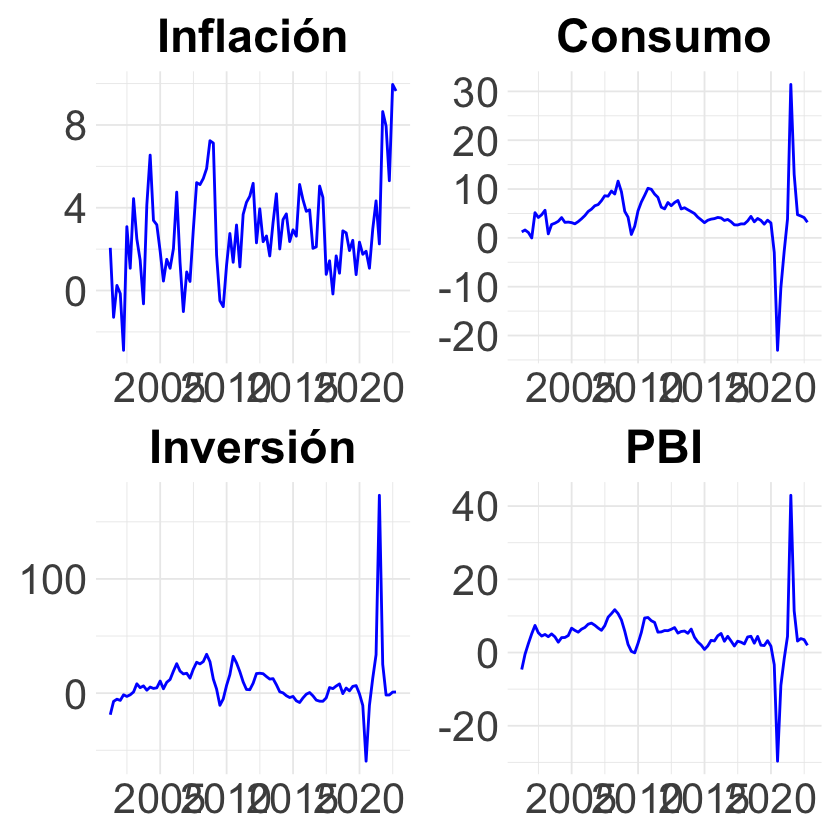

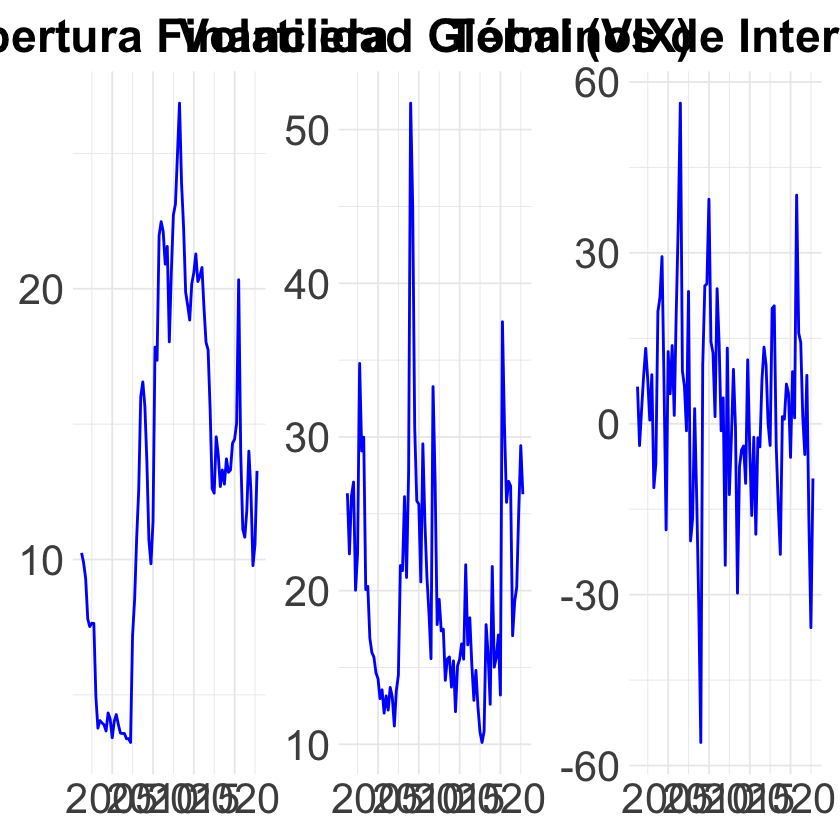

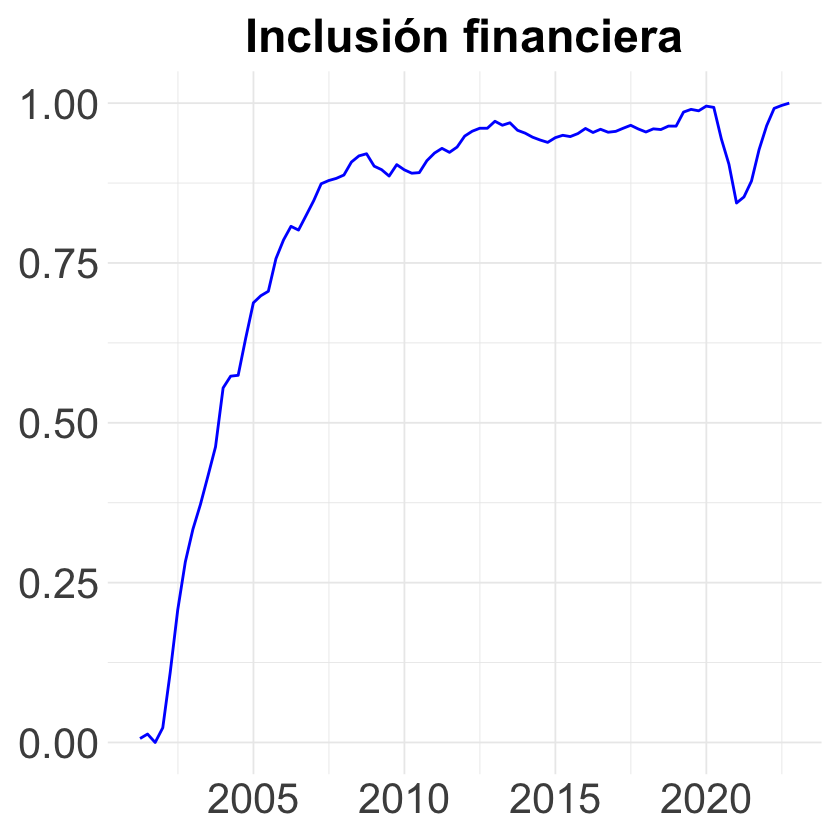

In [63]:
# Títulos personalizados para cada grupo
titles_group1 <- c("Z-Score Bancario", "Morosidad (% créditos directos)", "Ratio de Capital Global", "Concentración Bancaria (IHH)", "Créditos bancarios (var. anualizada)")
titles_group2 <- c("Inflación", "Consumo", "Inversión", "PBI")
titles_group3 <- c("Apertura Financiera", "Volatilidad Global (VIX)", "Términos de Intercambio")
titles_group4 <- c("Inclusión financiera")

# Generar gráficos para cada grupo con títulos personalizados
plots_group1 <- plot_group(group1, titles_group1, data)
plots_group2 <- plot_group(group2, titles_group2, data)
plots_group3 <- plot_group(group3, titles_group3, data)
plots_group4 <- plot_group(group4, titles_group4, data)

# Mostrar gráficos de cada grupo
wrap_plots(plots_group1)  # Gráficos del grupo 1
wrap_plots(plots_group2)  # Gráficos del grupo 2
wrap_plots(plots_group3)  # Gráficos del grupo 3
wrap_plots(plots_group4)  # Gráficos del grupo 4

In [13]:
# Función para guardar gráficos en un PNG
save_plots <- function(plots, filename, ncol, nrow, width = 1800, height = 2000) {
  png(filename, width = width, height = height)
  grid.arrange(grobs = plots, ncol = ncol, nrow = nrow, 
               top = textGrob(NULL, gp = gpar(fontsize = 24, fontface = "bold")))
  dev.off()
}

# Guardar cada grupo de gráficos
save_plots(plots_group1, "Series_de_tiempo_grupo1.png", ncol = 2, nrow = 3)
save_plots(plots_group2, "Series_de_tiempo_grupo2.png", ncol = 2, nrow = 2)
save_plots(plots_group3, "Series_de_tiempo_grupo3.png", ncol = 2, nrow = 2)  # Ajustar layout según cantidad de gráficos
save_plots(plots_group4, "Series_de_tiempo_grupo4.png", ncol = 1, nrow = 1, width = 900, height = 900) # Más pequeño para 1 gráfico

pdf 
  2

pdf 
  2

pdf 
  2

pdf 
  2

In [148]:
Sys.setlocale("LC_ALL", "es_ES.UTF-8")

[1] "es_ES.UTF-8/es_ES.UTF-8/es_ES.UTF-8/C/es_ES.UTF-8/C"

In [65]:
# Grupos de variables
group1 <- c("GROWTH", "CONSUM", "INVEST", "INFLATION")  # Variables macroeconómicas
group2 <- c("CREDIT", "BZSCORE", "NPL", "BANK_CON")       # Variables del sector bancario

# Función para graficar un grupo de correlaciones
plot_group_correlation <- function(variables, data, title) {
  plots <- lapply(variables, function(var) {
    ggplot(data, aes(x = .data[[var]], y = FINDEX)) +
      geom_point(color = "blue", size = 3, alpha = 0.7) +
      geom_smooth(method = "lm", color = "red", se = FALSE) +
      theme_minimal() +
      labs(x = var, y = "FINDEX") +  # Título del gráfico individual eliminado
      theme(
        axis.text.x = element_text(size = 12, family = "sans"),
        axis.text.y = element_text(size = 12, family = "sans"),
        axis.title.x = element_text(size = 14, family = "sans"),
        axis.title.y = element_text(size = 14, family = "sans"),
        plot.title = element_blank()  # Sin título en los gráficos individuales
      )
  })
  
  # Combinar los gráficos individuales
  combined_plot <- wrap_plots(plots) +
    plot_annotation(
      title = title,
      theme = theme(plot.title = element_text(size = 22, face = "bold", hjust = 0.5, family = "sans"))
    )
  return(combined_plot)
}

# Crear gráficos agrupados
plot1 <- plot_group_correlation(group1, data, title = "Inclusión financiera y agregados macroeconómicos")
plot2 <- plot_group_correlation(group2, data, title = "Inclusión financiera y agregados financieros")

In [30]:
# Guardar gráficos agrupados como PNG
ggsave("Correlacion_FINDEX_Macroeconomia.png", plot = plot1, width = 14, height = 8, dpi = 300)
ggsave("Correlacion_FINDEX_SectorBancario.png", plot = plot2, width = 14, height = 8, dpi = 300)


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


In [103]:
# install.packages("vars")

# VAR Model

In [104]:
library(vars)

In [105]:
data_ts <- ts(data[, -1], start = c(2001, 1), frequency = 4)
head(data_ts)

BZSCORE,NPL,GLOBAL_CAP,BANK_CON,CREDIT,INFLATION,CONSUM,INVEST,GROWTH,FIN_OPEN,VIX,TERMS,FINDEX
17.03940,10.393333,12.47667,1634.992,-32.4954417,2.0631384,6.147708,-14.972399,-4.639113,10.244489,26.33667,6.515126,0.006177982
16.38170,10.193333,12.20000,1649.719,6.8619593,-1.2932459,2.080168,-6.796180,-0.461018,9.878376,22.39333,-3.828285,0.013128082
16.50532,9.976667,12.70667,1621.507,-14.8054956,0.2450943,-1.314420,-7.576655,2.447751,9.289471,26.15667,2.542387,0.000000000
16.46407,9.456667,13.20333,1598.407,-6.9292332,-0.1491401,-4.890236,-10.891840,5.123269,7.806468,27.06667,8.485228,0.022969585
16.58633,9.143333,12.99333,1567.966,2.1091937,-2.8883692,-2.092735,-8.272091,7.397504,7.522508,20.02667,13.237194,0.109466353
16.88802,8.480000,13.07000,1547.626,0.3882406,3.0843987,-1.176227,-7.846822,5.411200,7.645399,22.43000,7.814029,0.207372555


In [51]:
var_model <- VAR(data_ts, p = 2, type = "const")

In [54]:
# Calcular las raíces del modelo VAR (asumimos que ya tienes el modelo ajustado)
roots_values <- roots(var_model)

# Extraer las partes reales e imaginarias de las raíces
real_part <- Re(roots_values)
imaginary_part <- Im(roots_values)

# Calculamos el módulo de cada raíz
root_modulus <- sqrt(real_part^2 + imaginary_part^2)

[1] 0.965904519 0.948184957 0.948184957 0.816174022 0.816174022 0.799863424
 [7] 0.799863424 0.795166049 0.795166049 0.756968704 0.675028229 0.675028229
[13] 0.661471034 0.661471034 0.569766974 0.569766974 0.562009755 0.562009755
[19] 0.560772035 0.560772035 0.439600032 0.439600032 0.386264921 0.255509719
[25] 0.255509719 0.008960205

In [53]:
# Calcular las raíces del modelo VAR (asumimos que ya tienes el modelo ajustado)
roots_values <- roots(var_model)

# Extraer las partes reales e imaginarias de las raíces
real_part <- Re(roots_values)
imaginary_part <- Im(roots_values)

# Calculamos el módulo de cada raíz
root_modulus <- sqrt(real_part^2 + imaginary_part^2)

# Verifica qué raíces están dentro del círculo unitario (estables)
stable_roots <- which(root_modulus <= 1)

# Asociamos las raíces estables con las variables correspondientes
stable_variables <- rep(variables, each = roots_per_variable)[stable_roots]

# Mostrar las variables que tienen raíces dentro del círculo unitario (estables)
print(stable_variables)

unstable_roots <- which(root_modulus > 1)
unstable_variables <- rep(variables, each = roots_per_variable)[unstable_roots]
print(unstable_variables)

ERROR: Error: objeto 'roots_per_variable' no encontrado


In [106]:
data_df <- as.data.frame(data_ts)
colnames(data_df)

library(dplyr)

data_df <- data_df %>%
  mutate(
    diff_BZSCORE = c(NA, diff(log(BZSCORE))),
    diff_NPL = c(NA, diff(log(NPL))),
    diff_GLOBAL_CAP = c(NA, diff(log(GLOBAL_CAP)))  # Cambié GLOBAL_CAP a GOBLAL_CAP
  )

data_df <- data_df[, !(names(data_df) %in% c("BZSCORE", "NPL", "GLOBAL_CAP"))]

[1] "BZSCORE"    "NPL"        "GLOBAL_CAP" "BANK_CON"   "CREDIT"    
 [6] "INFLATION"  "CONSUM"     "INVEST"     "GROWTH"     "FIN_OPEN"  
[11] "VIX"        "TERMS"      "FINDEX"

In [107]:
# Eliminar NA generados por la diferencia logarítmica
data_df <- na.omit(data_df)
# Vuelve a convertir a ts (serie temporal)
data_ts <- ts(data_df, start = c(2001, 2), frequency = 4)

In [108]:
data_ts

,BANK_CON,CREDIT,INFLATION,CONSUM,INVEST,GROWTH,FIN_OPEN,VIX,TERMS,FINDEX,diff_BZSCORE,diff_NPL,diff_GLOBAL_CAP
2001 Q2,1649.719,6.8619593,-1.2932459,2.08016799,-6.79617990,-0.46101802,9.878376,22.39333,-3.8282854,0.01312808,-3.936327e-02,-0.019430663,-0.0224242815
2001 Q3,1621.507,-14.8054956,0.2450943,-1.31441995,-7.57665498,2.44775061,9.289471,26.15667,2.5423874,0.00000000,7.517724e-03,-0.021484879,0.0406908384
2001 Q4,1598.407,-6.9292332,-0.1491401,-4.89023629,-10.89184038,5.12326933,7.806468,27.06667,8.4852275,0.02296959,-2.502135e-03,-0.053529073,0.0383425328
2002 Q1,1567.966,2.1091937,-2.8883692,-2.09273537,-8.27209121,7.39750433,7.522508,20.02667,13.2371940,0.10946635,7.398177e-03,-0.033694944,-0.0160329176
2002 Q2,1547.626,0.3882406,3.0843987,-1.17622650,-7.84682194,5.41120018,7.645399,22.43000,7.8140292,0.20737256,1.802563e-02,-0.075314566,0.0058831222
2002 Q3,1566.905,9.2574397,1.0770445,0.22156614,-5.69832447,4.50306195,7.639095,34.78667,0.6370715,0.28256867,-2.508348e-02,-0.027497249,-0.0159386408
2002 Q4,1563.053,-7.9720289,4.4394385,0.67385554,-3.71923901,4.93727731,4.923131,29.08667,8.6079559,0.33368278,1.782122e-02,-0.027443869,0.0411225454
2003 Q1,1675.679,-16.2813623,2.4927741,-3.35950421,3.69055352,4.32796437,3.771416,29.98333,-11.2198526,0.37206536,-7.554999e-03,-0.021831262,-0.0244190862
2003 Q2,1870.110,5.6424396,1.4679438,-2.23289331,-0.27930208,5.08532130,4.050050,20.06667,-7.0291080,0.41647424,3.285000e-03,-0.012385381,-0.0048537584
2003 Q3,1830.256,-5.2828394,-0.6417172,-1.22405156,1.96927110,4.28262107,3.965797,20.28000,19.7221655,0.46232253,2.845532e-02,-0.003012699,-0.0077121205


In [70]:
data_ts <- ts(data_df, start = c(2001, 2), frequency = 4)
# Verifica las primeras filas para confirmar que las columnas fueron eliminadas
head(data_ts)

BANK_CON,CREDIT,INFLATION,GROWTH,FIN_OPEN,VIX,TERMS,FINDEX,diff_BZSCORE,diff_NPL,diff_GLOBAL_CAP
1649.719,6.8619593,-1.2932459,1.59674395,9.878376,22.39333,-3.8282854,0.01312808,-0.039363271,-0.01943066,-0.022424282
1621.507,-14.8054956,0.2450943,1.09513835,9.289471,26.15667,2.5423874,0.00000000,0.007517724,-0.02148488,0.040690838
1598.407,-6.9292332,-0.1491401,-0.01750847,7.806468,27.06667,8.4852275,0.02296959,-0.002502135,-0.05352907,0.038342533
1567.966,2.1091937,-2.8883692,5.02173240,7.522508,20.02667,13.2371940,0.10946635,0.007398177,-0.03369494,-0.016032918
1547.626,0.3882406,3.0843987,4.08667203,7.645399,22.43000,7.8140292,0.20737256,0.018025629,-0.07531457,0.005883122
1566.905,9.2574397,1.0770445,4.62593964,7.639095,34.78667,0.6370715,0.28256867,-0.025083482,-0.02749725,-0.015938641


In [86]:
lag_selection <- VARselect(data_ts, lag.max = 20, type = "const")
lag_selection$selection

AIC(n)  HQ(n)  SC(n) FPE(n) 
     5      5      5      6

In [73]:
library(tseries)
adf_results <- apply(data_ts, 2, function(x) adf.test(x))
print(adf_results)

Warning message in adf.test(x):
"p-value smaller than printed p-value"


$BANK_CON

	Augmented Dickey-Fuller Test

data:  x
Dickey-Fuller = -3.3235, Lag order = 4, p-value = 0.07312
alternative hypothesis: stationary


$CREDIT

	Augmented Dickey-Fuller Test

data:  x
Dickey-Fuller = -2.6979, Lag order = 4, p-value = 0.2894
alternative hypothesis: stationary


$INFLATION

	Augmented Dickey-Fuller Test

data:  x
Dickey-Fuller = -2.4221, Lag order = 4, p-value = 0.4026
alternative hypothesis: stationary


$GROWTH

	Augmented Dickey-Fuller Test

data:  x
Dickey-Fuller = -3.3283, Lag order = 4, p-value = 0.07233
alternative hypothesis: stationary


$FIN_OPEN

	Augmented Dickey-Fuller Test

data:  x
Dickey-Fuller = -1.3298, Lag order = 4, p-value = 0.8512
alternative hypothesis: stationary


$VIX

	Augmented Dickey-Fuller Test

data:  x
Dickey-Fuller = -2.2122, Lag order = 4, p-value = 0.4888
alternative hypothesis: stationary


$TERMS

	Augmented Dickey-Fuller Test

data:  x
Dickey-Fuller = -3.6514, Lag order = 4, p-value = 0.03371
alternative hypothesis: statio

In [88]:
# Supongamos que 'data_ts' es un objeto ts convertido a data.frame
# Primero conviértelo a un data frame si no lo es
data_ts_df <- as.data.frame(data_ts)

# Renombrar las variables
colnames(data_ts_df) <- c("BZSCORE", "NPL", "GLOBAL_CAP")

# Si necesitas convertirlo de nuevo a ts
data_ts <- ts(data_ts_df, start = start(data_ts), frequency = frequency(data_ts))
data_ts

,BZSCORE,NPL,GLOBAL_CAP,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2001 Q2,1649.719,6.8619593,-1.2932459,2.08016799,-6.79617990,-0.46101802,9.878376,22.39333,-3.8282854,0.01312808,-3.936327e-02,-0.019430663,-0.0224242815
2001 Q3,1621.507,-14.8054956,0.2450943,-1.31441995,-7.57665498,2.44775061,9.289471,26.15667,2.5423874,0.00000000,7.517724e-03,-0.021484879,0.0406908384
2001 Q4,1598.407,-6.9292332,-0.1491401,-4.89023629,-10.89184038,5.12326933,7.806468,27.06667,8.4852275,0.02296959,-2.502135e-03,-0.053529073,0.0383425328
2002 Q1,1567.966,2.1091937,-2.8883692,-2.09273537,-8.27209121,7.39750433,7.522508,20.02667,13.2371940,0.10946635,7.398177e-03,-0.033694944,-0.0160329176
2002 Q2,1547.626,0.3882406,3.0843987,-1.17622650,-7.84682194,5.41120018,7.645399,22.43000,7.8140292,0.20737256,1.802563e-02,-0.075314566,0.0058831222
2002 Q3,1566.905,9.2574397,1.0770445,0.22156614,-5.69832447,4.50306195,7.639095,34.78667,0.6370715,0.28256867,-2.508348e-02,-0.027497249,-0.0159386408
2002 Q4,1563.053,-7.9720289,4.4394385,0.67385554,-3.71923901,4.93727731,4.923131,29.08667,8.6079559,0.33368278,1.782122e-02,-0.027443869,0.0411225454
2003 Q1,1675.679,-16.2813623,2.4927741,-3.35950421,3.69055352,4.32796437,3.771416,29.98333,-11.2198526,0.37206536,-7.554999e-03,-0.021831262,-0.0244190862
2003 Q2,1870.110,5.6424396,1.4679438,-2.23289331,-0.27930208,5.08532130,4.050050,20.06667,-7.0291080,0.41647424,3.285000e-03,-0.012385381,-0.0048537584
2003 Q3,1830.256,-5.2828394,-0.6417172,-1.22405156,1.96927110,4.28262107,3.965797,20.28000,19.7221655,0.46232253,2.845532e-02,-0.003012699,-0.0077121205


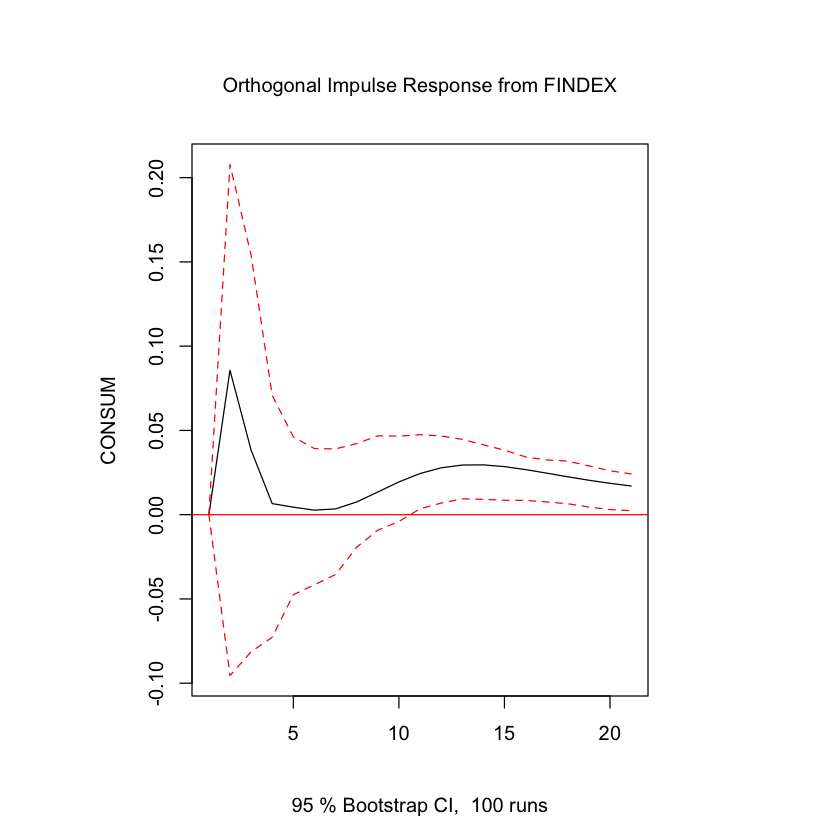

In [119]:
var_model <- VAR(data_ts, p = 1, type = "const")

# Generación de las Impulse Response Functions (IRF)
irf_result <- irf(var_model, impulse = "FINDEX", response = "CONSUM", n.ahead = 20, boot = TRUE)

# Función para graficar la IRF de manera dinámica
plot_irf <- function(var_model, impulse_var, response_var, n_ahead = 20) {
  irf_result <- irf(var_model, impulse = impulse_var, response = response_var, n.ahead = n_ahead, boot = TRUE)
  plot(irf_result)
}

# Uso de la función para graficar IRF de "VIX" en "INFLATION"
plot_irf(var_model, impulse_var = "FINDEX", response_var = "CONSUM", n_ahead = 20)

In [104]:
data_ts

,BANK_CON,CREDIT,INFLATION,GROWTH,FIN_OPEN,VIX,TERMS,FINDEX,diff_BZSCORE,diff_NPL,diff_GLOBAL_CAP
2001 Q2,1649.719,6.8619593,-1.2932459,1.59674395,9.878376,22.39333,-3.8282854,0.01312808,-3.936327e-02,-0.019430663,-0.0224242815
2001 Q3,1621.507,-14.8054956,0.2450943,1.09513835,9.289471,26.15667,2.5423874,0.00000000,7.517724e-03,-0.021484879,0.0406908384
2001 Q4,1598.407,-6.9292332,-0.1491401,-0.01750847,7.806468,27.06667,8.4852275,0.02296959,-2.502135e-03,-0.053529073,0.0383425328
2002 Q1,1567.966,2.1091937,-2.8883692,5.02173240,7.522508,20.02667,13.2371940,0.10946635,7.398177e-03,-0.033694944,-0.0160329176
2002 Q2,1547.626,0.3882406,3.0843987,4.08667203,7.645399,22.43000,7.8140292,0.20737256,1.802563e-02,-0.075314566,0.0058831222
2002 Q3,1566.905,9.2574397,1.0770445,4.62593964,7.639095,34.78667,0.6370715,0.28256867,-2.508348e-02,-0.027497249,-0.0159386408
2002 Q4,1563.053,-7.9720289,4.4394385,5.49085796,4.923131,29.08667,8.6079559,0.33368278,1.782122e-02,-0.027443869,0.0411225454
2003 Q1,1675.679,-16.2813623,2.4927741,0.81969333,3.771416,29.98333,-11.2198526,0.37206536,-7.554999e-03,-0.021831262,-0.0244190862
2003 Q2,1870.110,5.6424396,1.4679438,2.70204200,4.050050,20.06667,-7.0291080,0.41647424,3.285000e-03,-0.012385381,-0.0048537584
2003 Q3,1830.256,-5.2828394,-0.6417172,2.96184899,3.965797,20.28000,19.7221655,0.46232253,2.845532e-02,-0.003012699,-0.0077121205
